In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,5,10,20,Tree val,Naive
0,0.875000,0.750000,0.750000,0.500000,1.0
1,1.000000,1.000000,1.000000,1.000000,1.0
2,1.000000,0.875000,0.857143,1.000000,1.0
3,0.857143,0.875000,0.625000,1.000000,1.0
4,0.750000,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...
16,1.000000,1.000000,1.000000,0.833333,1.0
17,1.000000,0.875000,1.000000,1.000000,1.0
18,0.714286,0.714286,0.875000,0.750000,1.0
19,1.000000,1.000000,1.000000,1.000000,1.0


In [5]:
length_df

,5,10,20,Tree val,Naive
0,1.777504,1.644052,1.253575,87.576885,2.652404
1,3.228188,3.708297,1.589374,3.686596,2.686666
2,2.913745,2.560061,2.032704,10.842240,2.825967
3,1.400838,1.174769,1.135445,5.935031,2.936172
4,1.361378,1.383686,1.203433,7.836975,2.588056
...,...,...,...,...,...
16,4.688725,2.608884,1.388819,12.570159,2.516833
17,1.346121,1.304148,3.516455,6.218381,2.684524
18,1.704179,1.392791,1.853823,124.051353,2.835286
19,2.039356,1.418186,1.466651,5.365810,2.695142


In [6]:
MSE_df

,5,10,20,Tree val,Naive
0,1.146409,1.172669,1.081074,1.045957,1.045957
1,1.376106,1.375592,1.391351,1.246226,1.246226
2,1.569231,1.350413,1.431750,1.498565,1.498565
3,1.835125,1.852223,2.324782,1.956788,1.956788
4,1.422562,1.447530,1.419506,1.531510,1.531510
...,...,...,...,...,...
16,1.401442,1.252940,1.319931,1.393824,1.393824
17,0.851898,1.069737,1.017154,0.824247,0.824247
18,1.223839,1.342469,1.312868,1.092775,1.092775
19,1.605987,1.352972,1.487049,1.574481,1.574481


In [9]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,50)
        elif metric == "MSE":
            axes[i].set_ylim(0,2)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 5           0.874402
10          0.870124
20          0.877722
Tree val    0.902201
Naive       1.000000
dtype: float64
Length :
 5            2.532202
10           2.755548
20           4.517051
Tree val    29.223840
Naive        2.745226
dtype: float64
MSE :
 5           1.317598
10          1.336633
20          1.355137
Tree val    1.319118
Naive       1.319118
dtype: float64


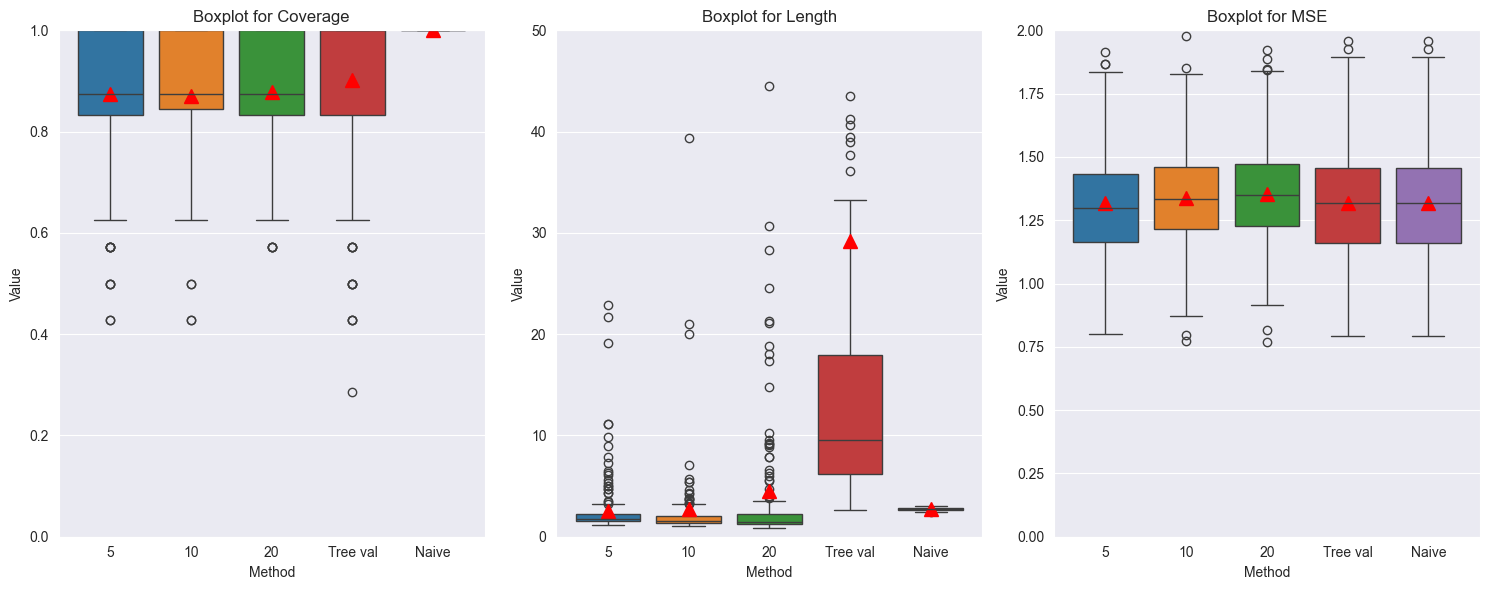

In [10]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])